# Simple Linear Regression

In [3]:
# Import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv(r'D:\Machine Learning\Machine-Learning\Regression\Linear Regression\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Total Data (Rows and Columns)
df.shape

(30, 2)

In [6]:
# describr Dataset
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
# Basic Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
# Checking Nulls
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

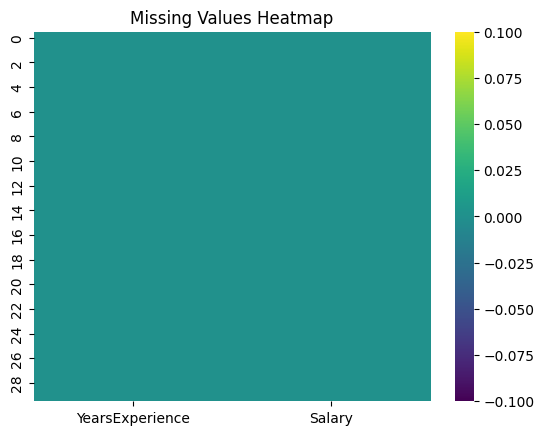

In [9]:
# Checking Nulls Through Heatmap
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

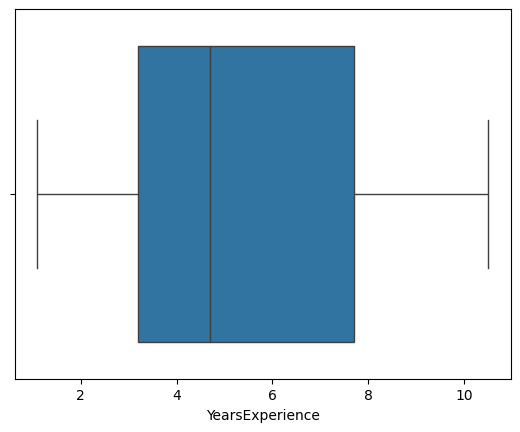

In [10]:
# Checking Outliers in YearsExperience Column
sns.boxplot(x='YearsExperience',data=df)
plt.show()

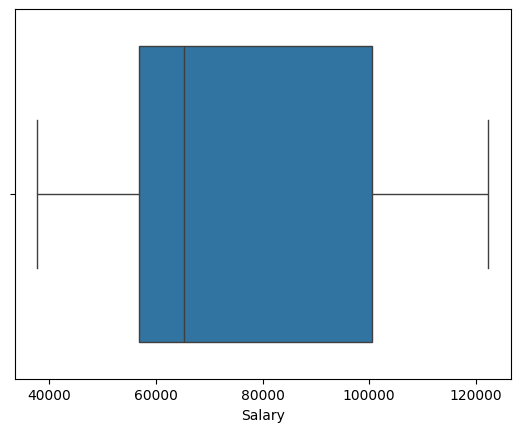

In [11]:
# Checking Outliers in Salary Column
sns.boxplot(x='Salary',data=df)
plt.show()

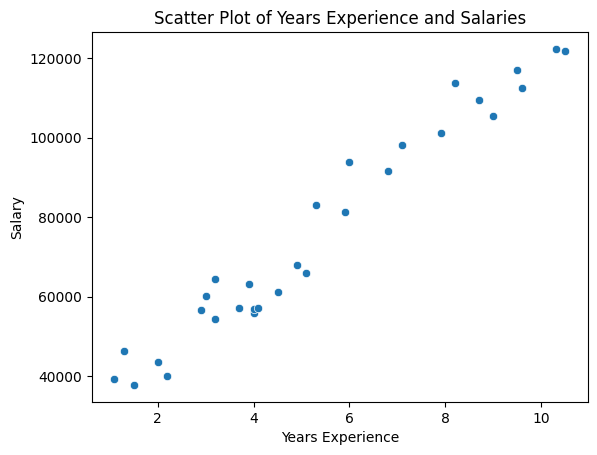

In [12]:
# scatter plot (To check Relation(Linear-Relation))
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])

# Set plot title and labels
plt.title('Scatter Plot of Years Experience and Salaries')
plt.xlabel('Years Experience')
plt.ylabel('Salary') 

# Show the plot
plt.show()

In [13]:
# Correlation 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


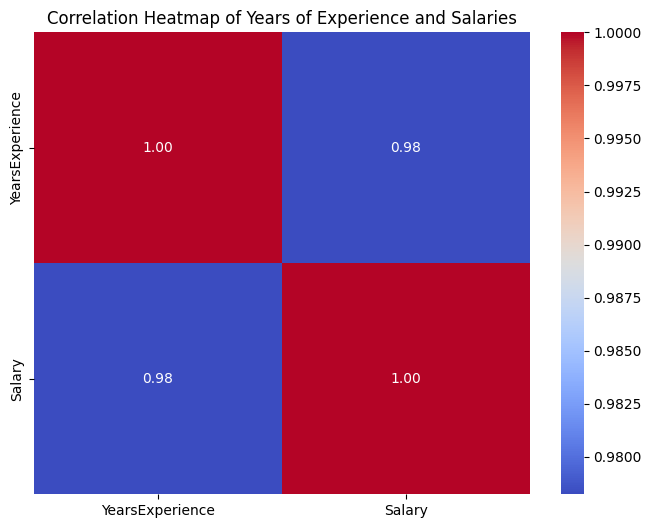

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Years of Experience and Salaries')
plt.show()


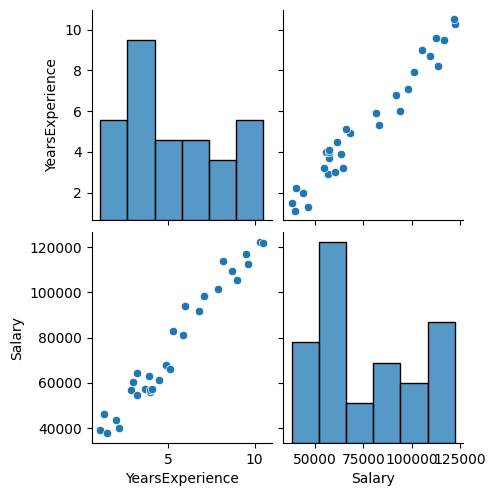

In [15]:
# Pair-plot Corr
sns.pairplot(df)

<Axes: xlabel='Salary', ylabel='Density'>

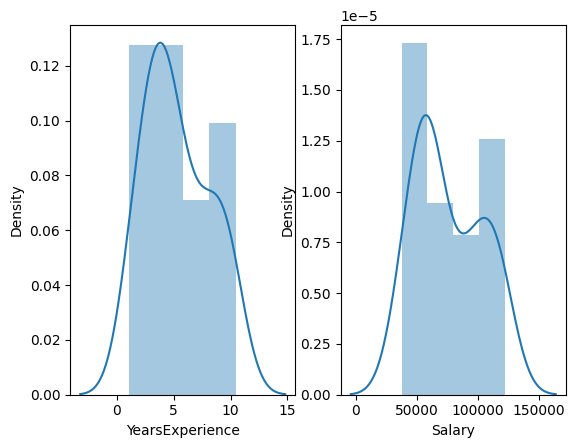

In [16]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.subplot(1,2,2)
sns.distplot(df['Salary'])

# Linear Regression

In [17]:
# Seperate the columns
X = df[['YearsExperience']]
y = df['Salary']

In [18]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [19]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [60]:
# Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [61]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# create model
model = LinearRegression()
model

LinearRegression()

In [63]:
# Fit model
model = model.fit(X_train, y_train)
model

LinearRegression()

Text(0, 0.5, 'Salary')

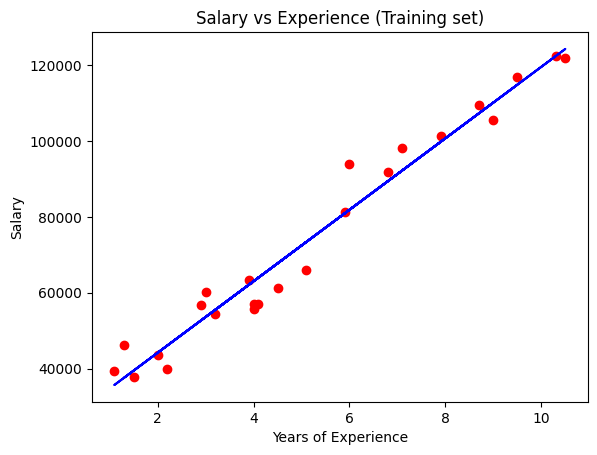

In [64]:
# Plotting

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [65]:
# Evaluating the model
test = model.score(X_test,y_test)
train = model.score(X_train,y_train)

print("Test score :",test) 
print("Train score :",train)

Test score : 0.9024461774180497
Train score : 0.9645401573418146


In [66]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [67]:
# prediction of Unknown values
unknown_pred_1 = model.predict([[5]])
unknown_pred_1

array([72440.65962693])

In [68]:
unknown_pred_2 = model.predict([[2.4], [3], [6.7], [8.9]])
unknown_pred_2

array([ 47938.73978705,  53593.02898087,  88461.14567608, 109193.53938675])

In [69]:
unknown_pred_3 = [[10], [20], [30], [40]]
unknown_pred = model.predict(unknown_pred_3)
unknown_pred

array([119559.73624209, 213797.8894724 , 308036.04270271, 402274.19593302])

In [70]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [71]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 27102249.73126139
Test MSE: 49830096.85590839


In [72]:
# Calculate additional metrics
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)


Train MSE: 27102249.73126139
Test MSE: 49830096.85590839
Train RMSE: 5205.982110155719
Test RMSE: 7059.04362190151
Train MAE: 4221.046734449738
Test MAE: 6286.453830757749
Train R2 Score: 0.9645401573418146
Test R2 Score: 0.9024461774180497
